<a href="https://colab.research.google.com/github/ShivamSinghal1/Talkingdata-Dataset/blob/main/Talkingdata_Dataset_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# First we have to mount google drive in google colab to get dataset from google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd 
import datetime
import os
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
# This is to make wider graphs and visualize better
sns.set(rc={'figure.figsize':(12,5)})
plt.figure(figsize=(12,5))

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

In [ ]:
# Importing dataset from drive 
data = pd.read_csv('/content/drive/MyDrive/Dataset/train_sample.csv')

**Each row of the training data contains a click record, with the following features.**



*   ip: ip address of click.
*   app: app id for marketing.
*   device: device type id of user mobile phone (e.g., iphone 6 plus, iphone 7, huawei mate 7, etc.)
*   os: os version id of user mobile phone
*   channel: channel id of mobile ad publisher
*   click_time: timestamp of click (UTC)
*   attributed_time: if user download the app for after clicking an ad, this is the time of the app download
*   is_attributed: the target that is to be predicted, indicating the app was downloaded

ip, app, device, os, and channel are encoded.

In [ ]:
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [ ]:
print("Total Number of data Sample we have - ",len(data))

Total Number of data Sample we have -  100000


We have 1Lakh Samples in our dataset.

ip, app, device, os and channel are categorical variables which is encoded as integers. We will set them as categories for analysis.


In [ ]:
variables = ['ip', 'app', 'device', 'os', 'channel']
for v in variables:
    data[v] = data[v].astype('category')

Next we will convert date stamps to date/time type.

In [ ]:
# click_time and attributed_time as timeseries
data['click_time'] = pd.to_datetime(data['click_time'])
data['attributed_time'] = pd.to_datetime(data['attributed_time'])

# as_attributed in train as a categorical
data['is_attributed']= data['is_attributed'].astype('category')

### Statistics

In [ ]:
data.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,ip,app,device,os,channel,click_time,attributed_time,is_attributed
count,100000.0,100000.0,100000.0,100000.0,100000.0,100000,227,100000.0
unique,34857.0,161.0,100.0,130.0,161.0,80350,227,2.0
top,5348.0,3.0,1.0,19.0,280.0,2017-11-08 12:01:02,2017-11-09 00:21:23,0.0
freq,669.0,18279.0,94338.0,23870.0,8114.0,7,1,99773.0
first,NaN,NaN,NaN,NaN,NaN,2017-11-06 16:00:00,2017-11-06 17:19:04,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-11-09 15:59:51,2017-11-09 15:28:15,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


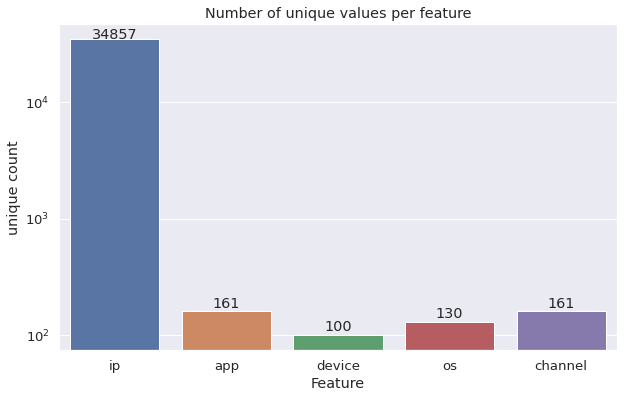

In [ ]:
# Graph to visualize Number of Unique Values per feature

plt.figure(figsize=(10, 6))
cols = ['ip', 'app', 'device', 'os', 'channel']
uniques = [len(data[col].unique()) for col in cols]
sns.set(font_scale=1.2)
ax = sns.barplot(cols, uniques, log=True)
ax.set(xlabel='Feature', ylabel='unique count', title='Number of unique values per feature')
for p, uniq in zip(ax.patches, uniques):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 10,
            uniq,
            ha="center") 

Checking to make sure that NaN values in 'attribute_time' are only for samples that did not convert.  

We will check that counts of 'attributed_time' values is same as count of converted clicks.

In [ ]:
#double check that 'attributed_time' is not Null for all values that resulted in download (i.e. is_attributed == 1)
data[['attributed_time', 'is_attributed']][data['is_attributed']==1].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,attributed_time,is_attributed
count,227,227.0
unique,227,1.0
top,2017-11-08 06:19:51,1.0
freq,1,227.0
first,2017-11-06 17:19:04,NaN
last,2017-11-09 15:28:15,NaN


**Observations** :
- There are only 227 attributed_time values.  This means only 227 out of 100000 clicks resulted in a download.  That's 0.23% !

- Missing values in train appear to be only for attributed_time, where there isn't any value due to no app download.

Only a small proportion of clicks were followed by a download:

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


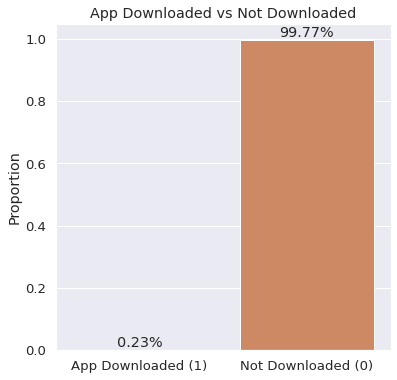

In [ ]:
plt.figure(figsize=(6,6))
#sns.set(font_scale=1.2)
mean = (data.is_attributed.values == 1).mean()
ax = sns.barplot(['App Downloaded (1)', 'Not Downloaded (0)'], [mean, 1-mean])
ax.set(ylabel='Proportion', title='App Downloaded vs Not Downloaded')
for p, uniq in zip(ax.patches, [mean, 1-mean]):
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height+0.01,
            '{}%'.format(round(uniq * 100, 2)),
            ha="center")

### Exploring ip counts.  We are Checking if multiple ips have any downloads.

We first think that If ip repeated too many times, was it a bot?
  
But this is not true, as repeated ips convert to downloads. 

We find this in below code.

In [ ]:
#temporary table to see ips with their associated count frequencies
temp = data['ip'].value_counts().reset_index(name='counts')
temp.columns = ['ip', 'counts']

In [ ]:
#we added temporary counts of ip feature ('counts') to the our dataset, to see if IPs with high counts have conversions or not
data= data.merge(temp, on='ip', how='left')
data.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,counts
0,87540,12,1,13,497,2017-11-07 09:30:38,NaT,0,8
1,105560,25,1,17,259,2017-11-07 13:40:27,NaT,0,149
2,101424,12,1,19,212,2017-11-07 18:05:24,NaT,0,2
3,94584,13,1,13,477,2017-11-07 04:58:08,NaT,0,3
4,68413,12,1,1,178,2017-11-09 09:00:09,NaT,0,4


In [ ]:
#check top 10 values
data[data['is_attributed']==1].sort_values('counts', ascending=False)[:10]

,ip,app,device,os,channel,click_time,attributed_time,is_attributed,counts
11680,5348,29,1,19,343,2017-11-07 23:07:12,2017-11-07 23:07:41,1,669
15821,5348,19,0,29,213,2017-11-07 14:17:49,2017-11-07 14:17:52,1,669
30073,5348,19,40,24,213,2017-11-09 10:47:39,2017-11-09 10:47:54,1,669
88104,5314,83,0,21,171,2017-11-06 23:07:45,2017-11-06 23:16:28,1,616
47464,5314,18,1,19,107,2017-11-08 12:23:04,2017-11-08 12:23:06,1,616
78399,5314,10,1,1,113,2017-11-07 23:21:15,2017-11-08 00:01:03,1,616
64677,111025,10,1,19,377,2017-11-07 13:45:35,2017-11-07 13:46:28,1,137
22433,44067,19,0,38,213,2017-11-09 11:41:11,2017-11-09 11:42:06,1,70
80075,5729,19,0,0,347,2017-11-07 07:33:23,2017-11-07 07:35:47,1,42
9277,118252,19,957,59,213,2017-11-07 13:19:35,2017-11-07 13:22:10,1,41


In [ ]:
data[data['is_attributed']==1].ip.describe()

count      227
unique     223
top       5348
freq         3
Name: ip, dtype: int64

So high frequency ip counts do get conversions. 

In [ ]:
#convert 'is_attributed' back to numeric for further calculation
data['is_attributed']=data['is_attributed'].astype(int)

### Conversion rates over Counts of 300 most popular IPs

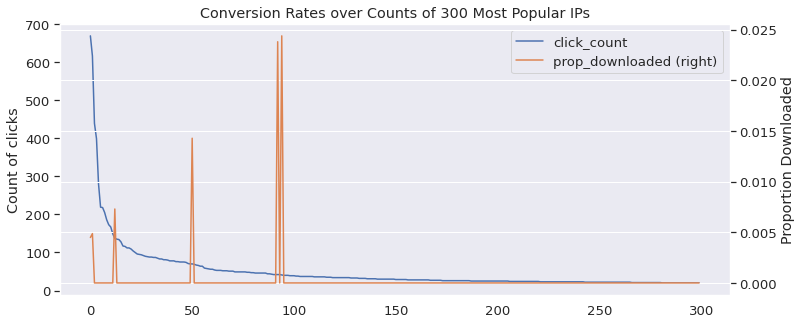

Counversion Rates over Counts of Most Popular IPs
        ip  click_count  prop_downloaded
0     5348          669         0.004484
1     5314          616         0.004870
2    73487          439         0.000000
3    73516          399         0.000000
4    53454          280         0.000000
5   114276          219         0.000000
6    26995          218         0.000000
7    95766          205         0.000000
8    17149          186         0.000000
9   100275          173         0.000000
10  105475          167         0.000000
11  105560          149         0.000000
12  111025          137         0.007299
13   43793          135         0.000000
14   86767          134         0.000000
15  137052          128         0.000000
16    5178          117         0.000000
17   49602          116         0.000000
18   48282          112         0.000000
19   48170          112         0.000000


In [ ]:
proportion = data[['ip', 'is_attributed']].groupby('ip', as_index=False).mean().sort_values('is_attributed', ascending=False)
counts = data[['ip', 'is_attributed']].groupby('ip', as_index=False).count().sort_values('is_attributed', ascending=False)
merge = counts.merge(proportion, on='ip', how='left')
merge.columns = ['ip', 'click_count', 'prop_downloaded']

ax = merge[:300].plot(secondary_y='prop_downloaded')
plt.title('Conversion Rates over Counts of 300 Most Popular IPs')
ax.set(ylabel='Count of clicks')
plt.ylabel('Proportion Downloaded')
plt.show()

print('Counversion Rates over Counts of Most Popular IPs')
print(merge[:20])


### Conversions by App

Check 100 most popular apps by click count:

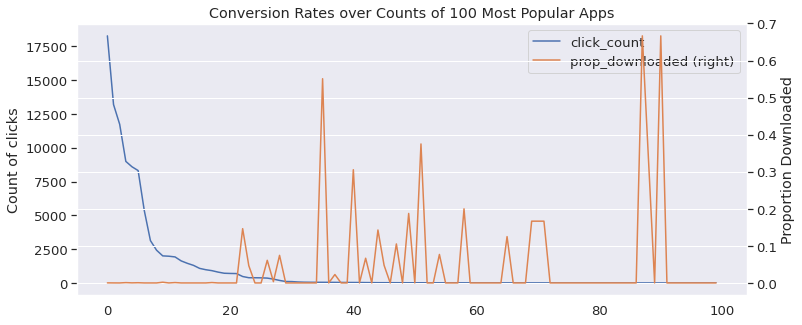

Counversion Rates over Counts of Most Popular Apps
   app  click_count  prop_downloaded
0    3        18279         0.000219
1   12        13198         0.000076
2    2        11737         0.000000
3    9         8992         0.000890
4   15         8595         0.000233
5   18         8315         0.000601
6   14         5359         0.000000
7    1         3135         0.000000
8   13         2422         0.000000
9    8         2004         0.001996
10  21         1979         0.000000
11  11         1927         0.001038
12  26         1633         0.000000
13  23         1454         0.000000
14   6         1303         0.000000
15  64         1079         0.000000
16   7          981         0.000000
17  20          911         0.001098
18  25          804         0.000000
19  28          720         0.000000


In [ ]:
proportion = data[['app', 'is_attributed']].groupby('app', as_index=False).mean().sort_values('is_attributed', ascending=False)
counts = data[['app', 'is_attributed']].groupby('app', as_index=False).count().sort_values('is_attributed', ascending=False)
merge = counts.merge(proportion, on='app', how='left')
merge.columns = ['app', 'click_count', 'prop_downloaded']

ax = merge[:100].plot(secondary_y='prop_downloaded')
plt.title('Conversion Rates over Counts of 100 Most Popular Apps')
ax.set(ylabel='Count of clicks')
plt.ylabel('Proportion Downloaded')
plt.show()

print('Counversion Rates over Counts of Most Popular Apps')
print(merge[:20])

### Conversions by OS
Look at top 100 operating systems by click count

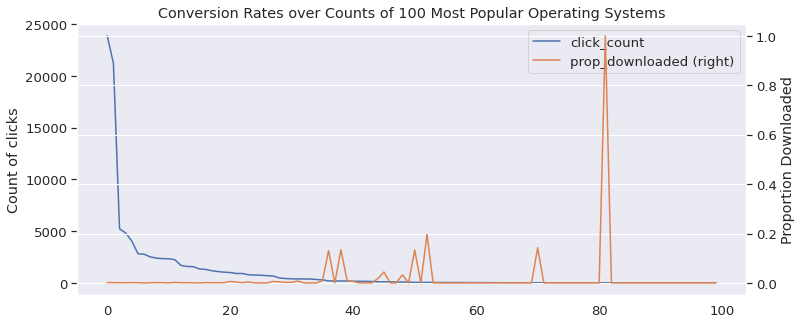

Counversion Rates over Counts of Most Popular Operating Systems
    os  click_count  prop_downloaded
0   19        23870         0.001718
1   13        21223         0.001178
2   17         5232         0.001147
3   18         4830         0.000828
4   22         4039         0.001486
5   10         2816         0.001065
6    8         2775         0.000000
7    6         2520         0.000794
8   15         2396         0.001669
9   20         2347         0.001278
10   9         2341         0.000427
11  25         2248         0.002224
12  16         1691         0.001183
13  37         1589         0.001259
14   3         1576         0.000635
15  41         1348         0.000000
16  14         1312         0.001524
17   1         1185         0.000844
18  12         1103         0.000907
19  23         1042         0.000960


In [ ]:
proportion = data[['os', 'is_attributed']].groupby('os', as_index=False).mean().sort_values('is_attributed', ascending=False)
counts = data[['os', 'is_attributed']].groupby('os', as_index=False).count().sort_values('is_attributed', ascending=False)
merge = counts.merge(proportion, on='os', how='left')
merge.columns = ['os', 'click_count', 'prop_downloaded']

ax = merge[:100].plot(secondary_y='prop_downloaded')
plt.title('Conversion Rates over Counts of 100 Most Popular Operating Systems')
ax.set(ylabel='Count of clicks')
plt.ylabel('Proportion Downloaded')
plt.show()

print('Counversion Rates over Counts of Most Popular Operating Systems')
print(merge[:20])

### Conversions by Device


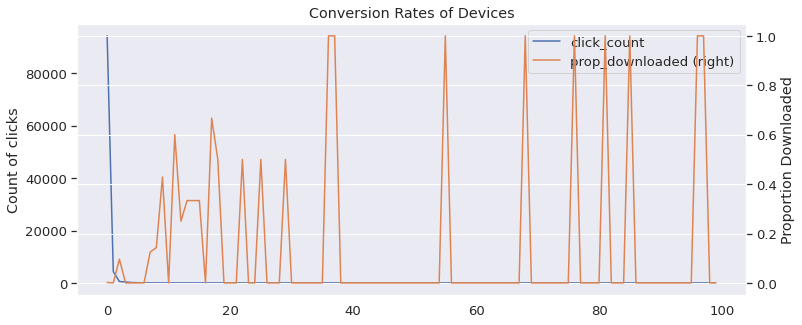

Count of clicks and proportion of downloads by device:
   device  click_count  prop_downloaded
0       1        94338         0.001548
1       2         4345         0.000460
2       0          541         0.096118
3    3032          371         0.000000
4    3543          151         0.000000
..    ...          ...              ...
95    196            1         0.000000
96    188            1         1.000000
97    180            1         1.000000
98    167            1         0.000000
99   3867            1         0.000000

[100 rows x 3 columns]


In [ ]:
proportion = data[['device', 'is_attributed']].groupby('device', as_index=False).mean().sort_values('is_attributed', ascending=False)
counts = data[['device', 'is_attributed']].groupby('device', as_index=False).count().sort_values('is_attributed', ascending=False)
merge = counts.merge(proportion, on='device', how='left')
merge.columns = ['device', 'click_count', 'prop_downloaded']

ax = merge.plot(secondary_y='prop_downloaded')
plt.title('Conversion Rates of Devices')
ax.set(ylabel='Count of clicks')
plt.ylabel('Proportion Downloaded')
plt.show()

print('Count of clicks and proportion of downloads by device:')
print(merge)

### Conversions by Channel


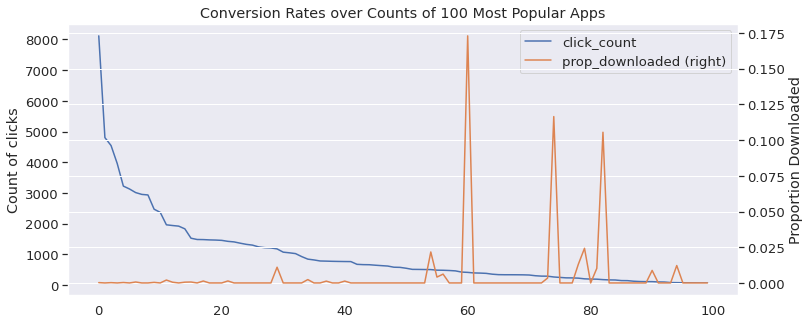

Counversion Rates over Counts of Most Popular Channels
   channel  click_count  prop_downloaded
0      280         8114         0.000246
1      245         4802         0.000000
2      107         4543         0.000220
3      477         3960         0.000000
4      134         3224         0.000310
5      259         3130         0.000000
6      265         3013         0.000664
7      153         2954         0.000000
8      178         2936         0.000000
9      121         2472         0.000405
10     205         2369         0.000000
11     145         1964         0.002037
12     442         1941         0.000515
13     459         1921         0.000000
14     379         1833         0.000546
15     439         1528         0.000654
16     128         1486         0.000000
17     466         1483         0.001349
18     135         1473         0.000000
19     480         1468         0.000000


In [ ]:
proportion = data[['channel', 'is_attributed']].groupby('channel', as_index=False).mean().sort_values('is_attributed', ascending=False)
counts = data[['channel', 'is_attributed']].groupby('channel', as_index=False).count().sort_values('is_attributed', ascending=False)
merge = counts.merge(proportion, on='channel', how='left')
merge.columns = ['channel', 'click_count', 'prop_downloaded']

ax = merge[:100].plot(secondary_y='prop_downloaded')
plt.title('Conversion Rates over Counts of 100 Most Popular Apps')
ax.set(ylabel='Count of clicks')
plt.ylabel('Proportion Downloaded')
plt.show()

print('Counversion Rates over Counts of Most Popular Channels')
print(merge[:20])

There appear to be a few peaks for channels at reasonable click quantity, but overall the pattern holds same as for categories above.  

In [ ]:
data['timePass']= data['attributed_time']-data['click_time']
data['timePass'].describe()

count                          227
mean     0 days 01:14:59.572687224
std      0 days 02:25:05.392661298
min                0 days 00:00:02
25%         0 days 00:00:52.500000
50%                0 days 00:03:18
75%         0 days 01:21:27.500000
max                0 days 12:52:21
Name: timePass, dtype: object